# CG Travel Diagram

This section determines CG position for various loading scenarios for the example airplane. These CG positions are also plotted to visualize how the CG moves. Following table summarizes the weight and corresponding CG location for the components from previous section, along with fuel and payload. It is assumed that the CG of the fuel will be same as the wing CG. The CG of the payload is estimated using seat locations in OpenVSP model. Refer to lecture notes and Roskam Chapter 10 for more details about CG travel diagram.

<div style="width:60%; margin: auto;">

Component | Weight (lbs) | Moment arm (ft)
 --- | :----: | :---:
Wing | 344 | 15.6
Fuselage | 367 | 15.7
Horizontal tail | 42 | 32.4
Vertical tail | 39 | 32.7
Main LG | 78 | 16.1
Nose LG | 26 | 7.4
Propulsion system | 1663 | 12.2
Miscellaneous | 555 | 15.7
Fuel | 1060 | 15.6
Payload (including pilot) | 1200 | 15.0
</div>

Above table will be used for computing the CG in four scenarios:

1. Airplane with no fuel and payload (empty weight)
2. Airplane loaded with fuel only
3. Airplane loaded with fuel and payload (maximum takeoff weight)
4. Airplane loaded with payload only

Below block computes CG location for above scenarios:

In [14]:
import numpy as np

# Weight and CG
W_wing, CG_wing = 344, 15.6
W_fuselage, CG_fuselage = 367, 15.7
W_ht, CG_ht = 42, 32.4
W_vt, CG_vt = 39, 32.7
W_mlg, CG_mlg = 78, 16.1
W_nlg, CG_nlg = 26, 7.4
W_prop, CG_prop = 1663, 12.2
W_misc, CG_misc = 555, 15.7
W_fuel, CG_fuel = 1060, 15.6
W_pay, CG_pay = 1200, 15.0

weights = np.array([W_wing, W_fuselage, W_ht, W_vt, W_mlg, W_nlg,W_prop, W_misc, W_fuel, W_pay])

CGs = np.array([CG_wing, CG_fuselage, CG_ht, CG_vt, CG_mlg, CG_nlg,CG_prop, CG_misc, CG_fuel, CG_pay])

print("CG locations with respect to origin of the reference system:")

# CG with no fuel and payload
W_empty = np.sum(weights[:-2])
xcg_empty = np.sum(weights[:-2]*CGs[:-2]) / W_empty
print(f"CG with no fuel and payload: {xcg_empty:.2f}")

# CG with fuel only
W_fuel_only = np.sum(weights[:-1])
xcg_fuel_only = np.sum(weights[:-1]*CGs[:-1]) / W_fuel_only
print(f"CG with fuel only: {xcg_fuel_only:.2f}")

# CG with payload only
W_pay_only = np.sum(weights[:-2]) + weights[-1]
xcg_pay_only = (np.sum(weights[:-2]*CGs[:-2]) + weights[-1]*CGs[-1]) / W_pay_only
print(f"CG with payload only: {xcg_pay_only:.2f}")

# CG with fuel and payload
W_max = np.sum(weights)
xcg_max = np.sum(weights*CGs) / W_max
print(f"CG with no fuel and payload: {xcg_max:.2f}")

CG locations with respect to origin of the reference system:
CG with no fuel and payload: 14.20
CG with fuel only: 14.55
CG with payload only: 14.42
CG with no fuel and payload: 14.65


Using above CG locations, below code block plots CG travel diagram:

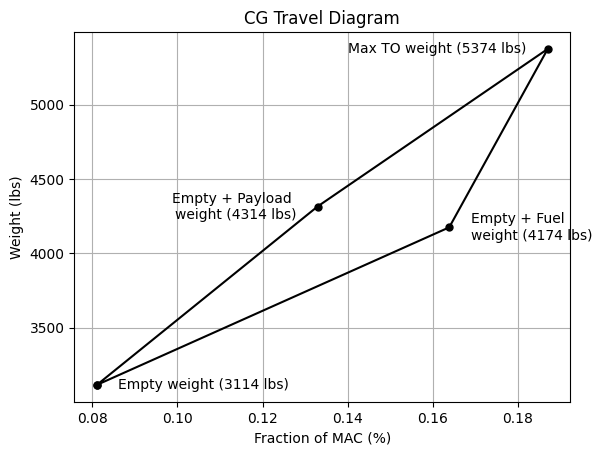

In [45]:
import matplotlib.pyplot as plt

xLE_mac = 13.85 # ft
mac = 4.3 # ft

xcg_empty_mac = (xcg_empty-xLE_mac)/mac
xcg_fuel_only_mac = (xcg_fuel_only-xLE_mac)/mac
xcg_pay_only_mac = (xcg_pay_only-xLE_mac)/mac
xcg_max_mac = (xcg_max-xLE_mac)/mac

# Seqeunce of loading
xcg_mac = [xcg_empty_mac, xcg_fuel_only_mac, xcg_max_mac, xcg_pay_only_mac, xcg_empty_mac]
W = [W_empty, W_fuel_only, W_max, W_pay_only, W_empty]

fig, ax = plt.subplots()
ax.plot(xcg_mac, W, "k-", marker="o", markersize=5)
ax.set_xlabel("Fraction of MAC (%)")
ax.set_ylabel("Weight (lbs)")
ax.set_title("CG Travel Diagram")
ax.annotate(f"Empty weight ({W_empty} lbs)", (xcg_empty_mac+0.005, W_empty), ha="left", va="center")
ax.annotate(f"Empty + Fuel \nweight ({W_fuel_only} lbs)", (xcg_fuel_only_mac+0.005, W_fuel_only), ha="left", va="center")
ax.annotate(f"Empty + Payload \nweight ({W_pay_only} lbs)", (xcg_pay_only_mac-0.005, W_pay_only), ha="right", va="center")
ax.annotate(f"Max TO weight ({W_max} lbs)", (xcg_max_mac-0.005, W_max), ha="right", va="center")
ax.grid()

Based on the above diagram, the most forward CG location (8.1% of MAC) is when plane is not loaded. This can be attributed to engines being mounted slightly ahead of the wing. The most aft CG location (18.7% of MAC) is when airplane is fully loaded. This range of CG travel is within the typical values observed for twin propeller driven airplanes, as outlined in Table 10.3 Roskam Part 2. It is recommended to plot the neutral point line on the CG travel diagram once it is computed from stability analysis.

> __*NOTE*__: Based on above calculations, the load distribution on the main and nose landing gear is different from what was used for sizing them. Hence, LG should be resized. Moreover, the tip over criteria and struts should be also sized. If the tip over criteria is not met, then move the landing gear position and redo the weight and balance analysis until all criteria are met.

This concludes the weight and balance section.